# Workshop 3 Titanic

## Emilio and Saffian

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## EDA

### Stats and correlations

In [3]:
# Read CSV file
titanic_data = pd.read_csv('train.csv', index_col='PassengerId')
titanic_test = pd.read_csv('test.csv', index_col='PassengerId')

# shape of data
titanic_data.shape
titanic_test.shape

# types of data
titanic_data.dtypes
titanic_test.dtypes

# types of data
titanic_data.tail()
titanic_test.tail()

# Descriptive stats
titanic_data.describe()
titanic_test.describe()

# including objects 
titanic_data.describe(include='object')
titanic_test.describe(include='object')

# information
titanic_data.info()
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

<AxesSubplot: ylabel='PassengerId'>

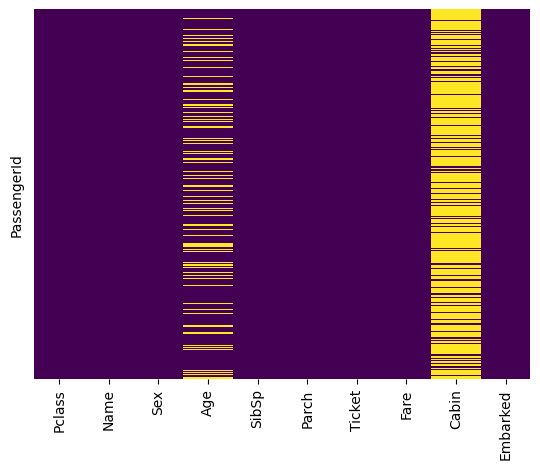

In [4]:
# Gráficos de correlaciones
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
sns.heatmap(titanic_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

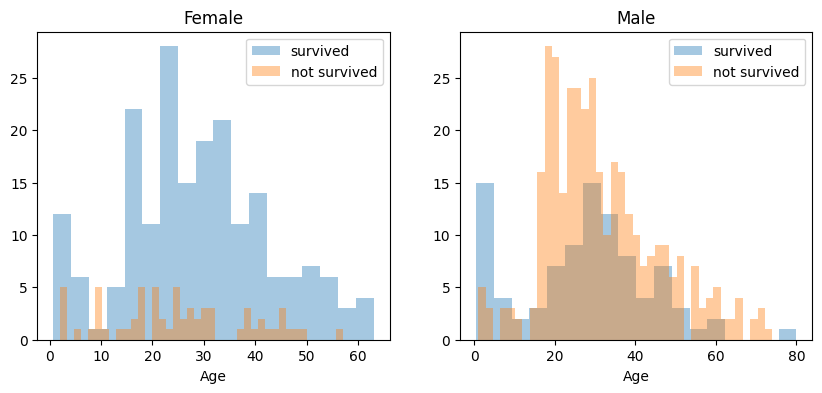

In [5]:
# plot survived vs not survived
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_data[titanic_data['Sex']=='female']
men = titanic_data[titanic_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

### Missing values

In [6]:
# replace values in Age category with average age of passenger of each class
lst1=[]
lst2=[]
lst3=[]
n=len(titanic_data.Survived)
i=1
while i< n:
    if titanic_data['Pclass'][i]==1 and pd.isnull(titanic_data['Age'][i]) == False:
        lst1.append(titanic_data['Age'][i])
    elif titanic_data['Pclass'][i]==2  and pd.isnull(titanic_data['Age'][i]) == False:
        lst2.append(titanic_data['Age'][i])
    elif titanic_data['Pclass'][i]==3 and pd.isnull(titanic_data['Age'][i]) == False :
        lst3.append(titanic_data['Age'][i])
    i+=1

Mean_Pclass_1 = sum(lst1)/len(lst1)
Mean_Pclass_2 = sum(lst2)/len(lst2)
Mean_Pclass_3 = sum(lst3)/len(lst3)


def impute (col):
    Age= col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return Mean_Pclass_1
        elif Pclass ==2:
            return Mean_Pclass_2
        else:
            return Mean_Pclass_3
    else:
        return Age
    

# Apply mean to data missing
titanic_data.Age= titanic_data[['Age', 'Pclass']].apply(impute, axis=1)
titanic_test.Age= titanic_test[['Age', 'Pclass']].apply(impute, axis=1)

In [7]:
# Age mean
#age_mean = titanic_data['Age'].mean()
# Applying mean into age column missing values
#titanic_data.loc[titanic_data.Age.isnull(), 'Age'] = age_mean
#titanic_data.info()
#titanic_test.loc[titanic_test.Age.isnull(), 'Age'] = age_mean
#titanic_test.info()

In [8]:
# lambda function to delete cabin number while leaving the letter and applying an "x" to missing value
titanic_data['Cabin'] = titanic_data.Cabin.apply(lambda c: c[0] if type(c) == str else 'X')
titanic_data.loc[titanic_data['Cabin'] == 'T', 'Cabin'] = 'X'
titanic_data

titanic_test['Cabin'] = titanic_test.Cabin.apply(lambda c: c[0] if type(c) == str else 'X')
titanic_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,X,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,X,S
894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,X,Q
895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,X,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,X,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,25.121243,0,0,A.5. 3236,8.0500,X,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,X,S


In [9]:
# fill missing values with mode
titanic_data['Embarked'].mode()
titanic_data.loc[titanic_data.Embarked.isnull(), 'Embarked'] = 'S'

In [10]:
# converting to numerical
titanic_data.Sex.replace(['male', 'female'], [1,0], inplace=True)
titanic_test.Sex.replace(['male', 'female'], [1,0], inplace=True)

titanic_data['Family'] = titanic_data['SibSp'] + titanic_data['Parch'] 
titanic_test['Family'] = titanic_test['SibSp'] + titanic_test['Parch'] 

#titanic_data['Embarked'].replace(['S','C','Q'],[1,2,3],inplace=True)
#titanic_test['Embarked'].replace(['S','C','Q'],[1,2,3],inplace=True)

In [11]:
# Replacing missing value with mean that matches the selection
Fare_missing = titanic_test[(titanic_test.Pclass == 3) & (titanic_test.Sex == 1)& (titanic_test.Family == 0)& (titanic_test.Embarked == "S")& (titanic_test.Cabin == 'X')].Fare.mean()
titanic_test.loc[titanic_test.Fare.isnull(), 'Fare'] = Fare_missing

In [12]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
 11  Family    891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 122.8+ KB


In [13]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
 10  Family    418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 39.2+ KB


### Correlations

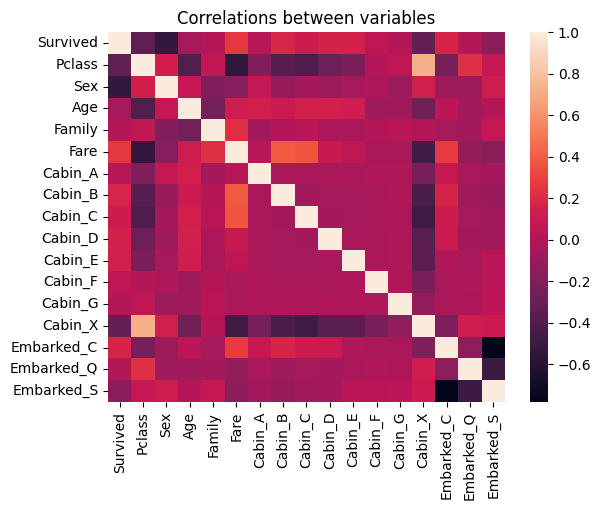

In [14]:
# converting categorical variables into numerical while saving in a new d
titanic_cleaned = pd.get_dummies(titanic_data[['Survived', 'Pclass', 'Sex',\
                             'Age', 'Family', 'Fare', 'Cabin', 'Embarked']])

# Correlations with cleaned data set
sns.heatmap(data=titanic_cleaned.corr()).set(title='Correlations between variables')
plt.savefig('Correlations.png',bbox_inches='tight')

### Graphs

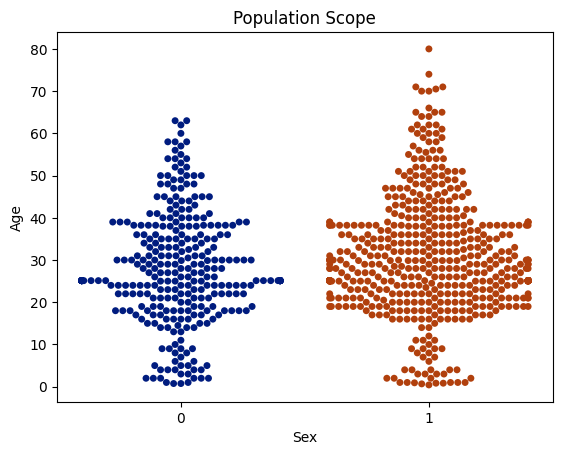

In [15]:
# Swarmplot
sns.swarmplot(data=titanic_data,x='Sex',y='Age', palette='dark').set(title="Population Scope")
plt.savefig('PopulationScope.png',bbox_inches='tight')

In [16]:
# Function to divide people in different age ranges
age_bins = []
for i in range(0,110,10):
    age_bins.append(i)

titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=age_bins, right=False)
age_groups_survival = titanic_data[['Survived','AgeGroup']].groupby('AgeGroup', as_index=False).sum()
age_groups_survival['Total'] = titanic_data[['Survived','AgeGroup']].groupby('AgeGroup', as_index=False).count()['Survived']

age_groups_survival

,AgeGroup,Survived,Total
0,"[0, 10)",38,62
1,"[10, 20)",41,102
2,"[20, 30)",115,367
3,"[30, 40)",87,197
4,"[40, 50)",34,89
5,"[50, 60)",20,48
6,"[60, 70)",6,19
7,"[70, 80)",0,6
8,"[80, 90)",1,1
9,"[90, 100)",0,0


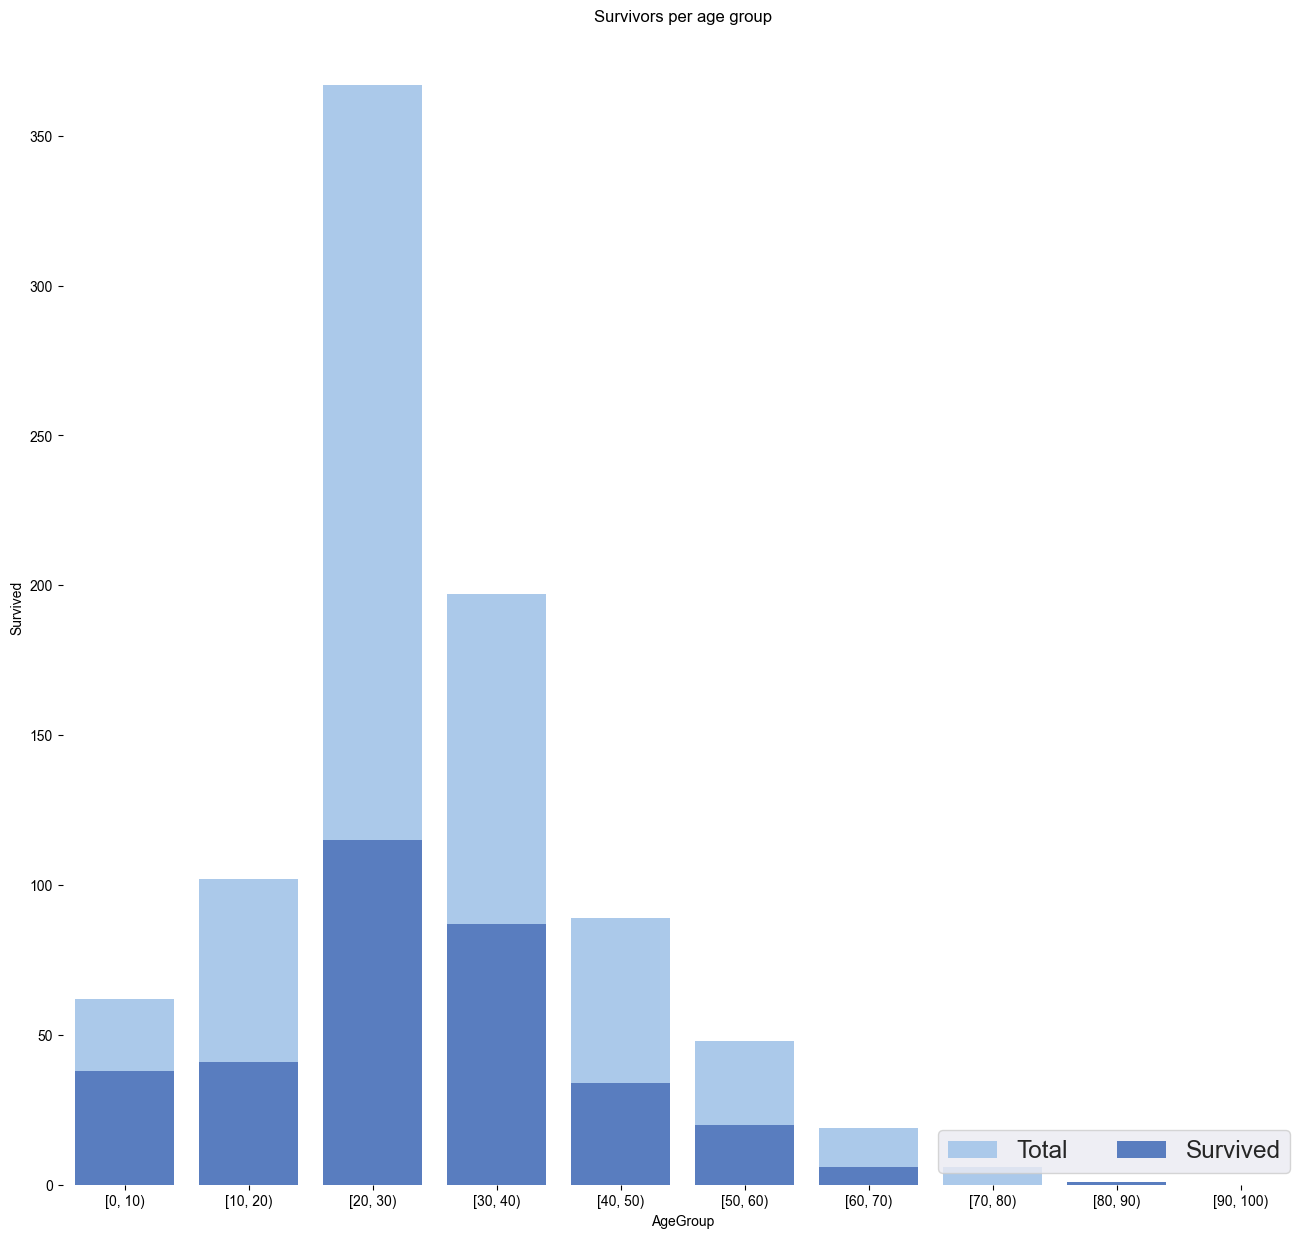

In [17]:
# Barplot to show level survivors vs total
f, ax = plt.subplots(figsize=(16, 15))

sns.set_color_codes("pastel")
sns.barplot(x="AgeGroup", y="Total", data=age_groups_survival,
            label="Total", color="b").set(title="Survivors per age group")

sns.set_color_codes("muted")
sns.barplot(x="AgeGroup", y="Survived", data=age_groups_survival,
            label="Survived", color="b")

sns.set(font_scale=1.6)

ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)

plt.savefig('Age_Groups_Survival.png',bbox_inches='tight')

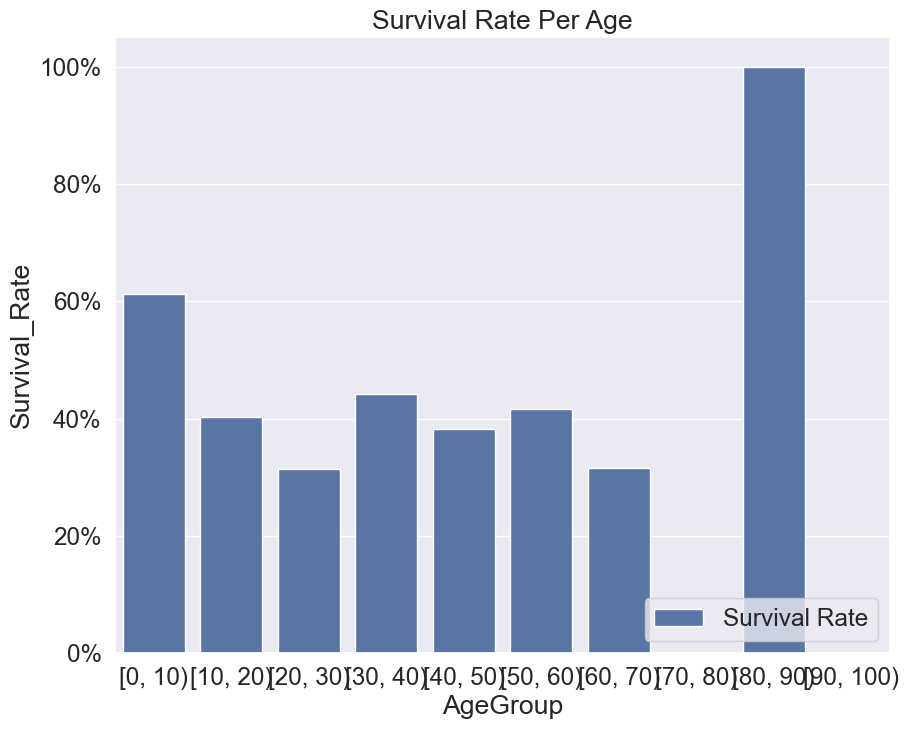

In [18]:
#Barplot to show percentage of survivors per group age
f, ax = plt.subplots(figsize=(10, 8))
age_groups_survival['Survival_Rate'] = age_groups_survival['Survived'] / age_groups_survival['Total']
sns.barplot(x="AgeGroup", y="Survival_Rate", data=age_groups_survival,
            label="Survival Rate", color="b").set(title="Survival Rate Per Age")
            
ax.legend(ncol=2, loc="lower right", frameon=True)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

sns.set(font_scale=1)

plt.savefig('survival_percentage_age.png',bbox_inches='tight')

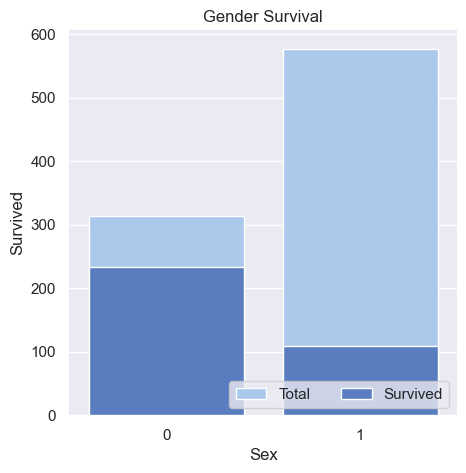

In [19]:
# Gender survival groupby
gender_survival = titanic_data[['Sex','Survived']].groupby('Sex', as_index=False).sum()
gender_survival['Total'] = titanic_data[['Sex','Survived']].groupby('Sex', as_index=False).count()['Survived']

gender_survival['Survival_Rate'] = gender_survival['Survived'] / gender_survival['Total'] 

# Plot to find survivors vs total
f, ax = plt.subplots(figsize=(5, 5))

sns.set_color_codes("pastel")
sns.barplot(x="Sex", y="Total", data=gender_survival,
            label="Total", color="b").set(title="Gender Survival")

sns.set_color_codes("muted")
sns.barplot(x="Sex", y="Survived", data=gender_survival,
            label="Survived", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)

plt.savefig('Gender_survival.png',bbox_inches='tight')

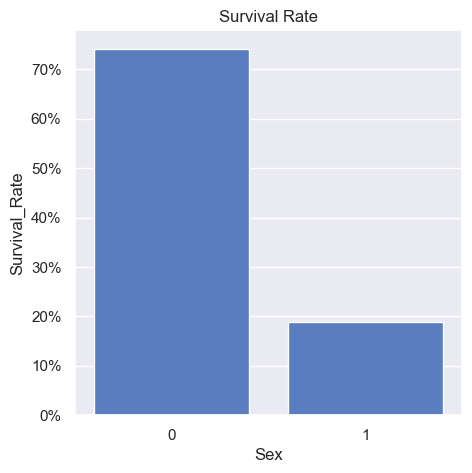

In [20]:
# Percentage of survivors
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x="Sex", y="Survival_Rate", data=gender_survival,
            label="Survival Rate", color="b").set(title="Survival Rate")
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.savefig('survival_rate.png',bbox_inches='tight')

## KNN, LR and LDA

In [21]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score

In [22]:
# converting categorical variables into numerical while saving in a new d
X  = pd.get_dummies(titanic_data[[ 'Pclass', 'Sex',\
                             'Age', 'Family', 'Fare', 'Cabin', 'Embarked']])
y= titanic_data['Survived']
X_test = pd.get_dummies(titanic_test[[ 'Pclass', 'Sex',\
                             'Age', 'Family', 'Fare', 'Cabin', 'Embarked']])


### KNN

Best k-value found in k: 4


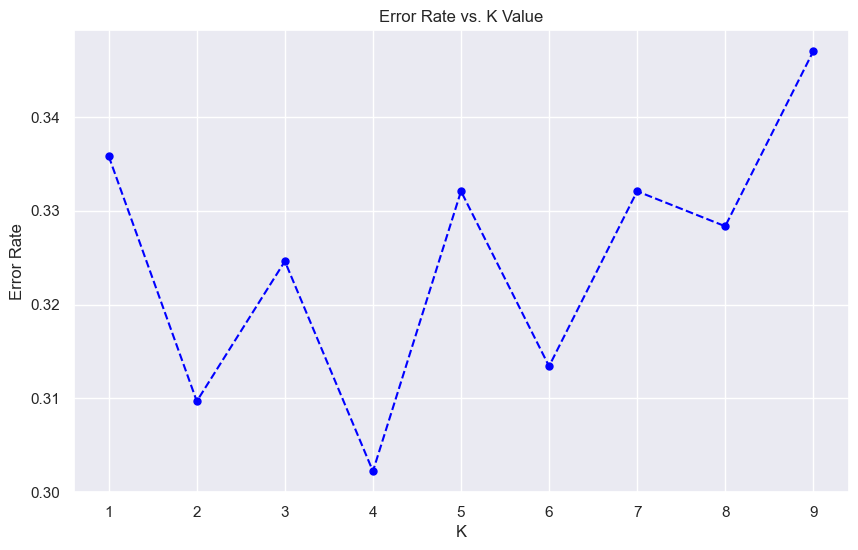

In [23]:
# KNN model using 70-30 proportion for the training split
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=0.3)

# finding optimal amount of K
error = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_eval)
    error.append(np.mean(y_pred != y_eval))


plt.figure(figsize=(10,6))
plt.plot(range(1,10),error ,color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

k_value_opt=error.index(min(error))+1
print("Best k-value found in k:", k_value_opt)

Best test size found for KNN:  0.21


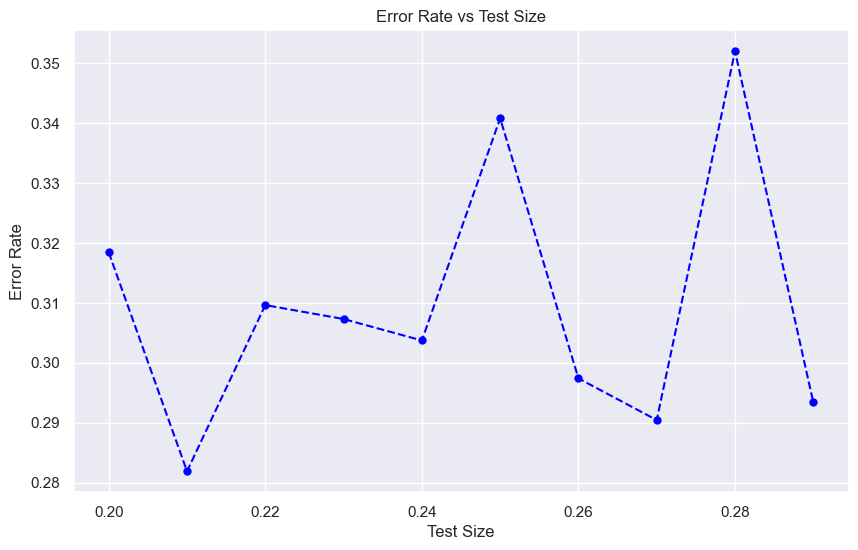

In [24]:

# finding optimal test size
errors = []
accuracy_knn = []
precision_knn = []
recall_knn = []
f1_knn = []
test_size = np.arange(.2,.3,.01)
for k in test_size:
    X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=k)
    knn = KNeighborsClassifier(n_neighbors = k_value_opt)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_eval)
    errors.append(np.mean(y_pred != y_eval))
    accuracy_knn.append(accuracy_score(y_eval, y_pred))
    precision_knn.append(metrics.precision_score(y_eval, y_pred))
    recall_knn.append(metrics.recall_score(y_eval, y_pred))
    f1_knn.append(metrics.f1_score(y_eval, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(test_size,errors ,color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=5)
plt.title('Error Rate vs Test Size')
plt.xlabel('Test Size')
plt.ylabel('Error Rate')

#plt.figure(figsize=(10,6))
#plt.plot(np.arange(.2,.3,.01),f1_knn ,color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=5)
#plt.title('F-score vs Test Size')
#plt.xlabel('Test Size')
#plt.ylabel('F-score')

knn_test_size = test_size[errors.index(min(errors))]
print('Best test size found for KNN: ',round(knn_test_size,2))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       116
           1       0.68      0.44      0.54        72

    accuracy                           0.71       188
   macro avg       0.70      0.66      0.66       188
weighted avg       0.70      0.71      0.69       188

77.55


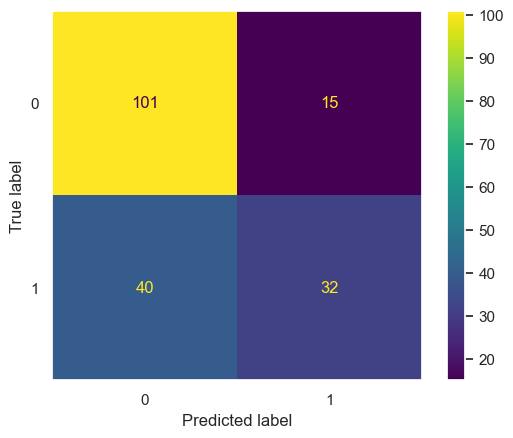

In [25]:
# KNN model using 70-30 proportion for the training split
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=knn_test_size)

knn=KNeighborsClassifier(n_neighbors = (k_value_opt)) 
knn.fit(X_train, y_train)  
y_pred = knn.predict(X_eval)
print(classification_report(y_eval,y_pred))
print(round(knn.score(X, y) * 100, 2))
confusion_matrix(y_eval, y_pred)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)

accuracy_knn = accuracy_score(y_eval, y_pred)
precision_knn = metrics.precision_score(y_eval, y_pred)
recall_knn = metrics.recall_score(y_eval, y_pred)
f1_knn = metrics.f1_score(y_eval, y_pred)

plot_confusion_matrix(knn, X_eval, y_eval)  
plt.grid(False)


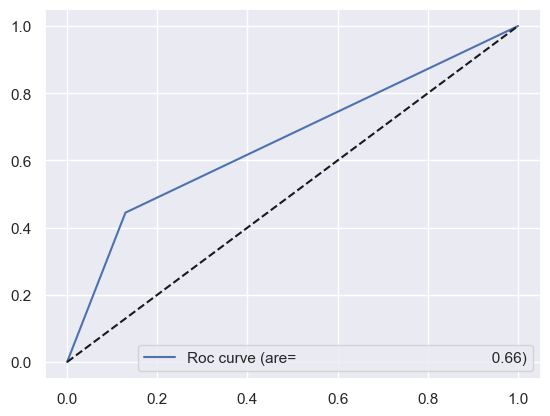

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_pred)
roc_auc = metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr, tpr, label="Roc curve (are=%50.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="lower right")

In [27]:
#Alternative way of finding neighbor
#from sklearn.model_selection import GridSearchCV
#grid=GridSearchCV(knn, dict(n_neighbors=list(range(1, 10))), cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
#grid_search_knn=grid.fit(X_train, y_train)
#print(grid_search_knn.best_params_)


In [28]:
knn_prediction = knn.predict(X_test)

### Logistic Regression

Best test size found for Logistic Regression:  0.2


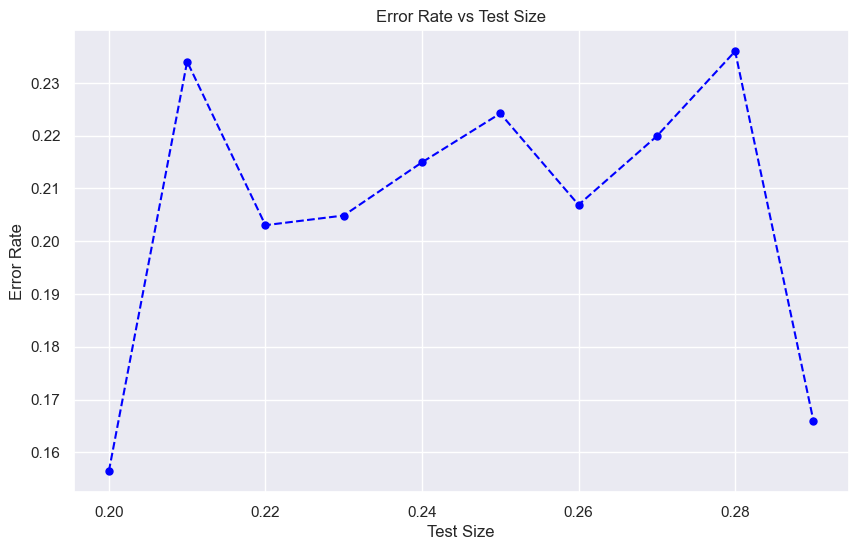

In [29]:
# finding optimal test size
errors = []
accuracy_logmodel = []
precision_logmodel = []
recall_logmodel = []
f1_logmodel = []
test_size = np.arange(.2,.3,.01)
for k in test_size:
    X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=k)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    y_pred = logmodel.predict(X_eval)
    errors.append(np.mean(y_pred != y_eval))
    accuracy_logmodel.append(accuracy_score(y_eval, y_pred))
    precision_logmodel.append(metrics.precision_score(y_eval, y_pred))
    recall_logmodel.append(metrics.recall_score(y_eval, y_pred))
    f1_logmodel.append(metrics.f1_score(y_eval, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(test_size,errors ,color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=5)
plt.title('Error Rate vs Test Size')
plt.xlabel('Test Size')
plt.ylabel('Error Rate')

logmodel_test_size = test_size[errors.index(min(errors))]
print('Best test size found for Logistic Regression: ',round(logmodel_test_size,2))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       120
           1       0.68      0.69      0.69        59

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



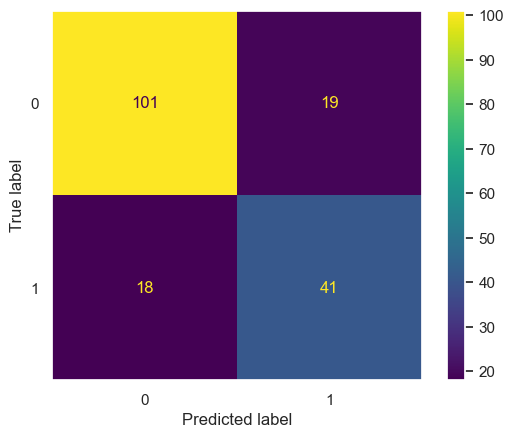

In [30]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=logmodel_test_size)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_eval)
print(classification_report(y_eval, y_pred))
confusion_matrix(y_eval, y_pred)

acc_log = round(logmodel.score(X_train, y_train) * 100, 2)

accuracy_lm = accuracy_score(y_eval, y_pred)
precision_lm = metrics.precision_score(y_eval, y_pred)
recall_lm = metrics.recall_score(y_eval, y_pred)
f1_lm = metrics.f1_score(y_eval, y_pred)

plot_confusion_matrix(logmodel, X_eval, y_eval)  
plt.grid(False)

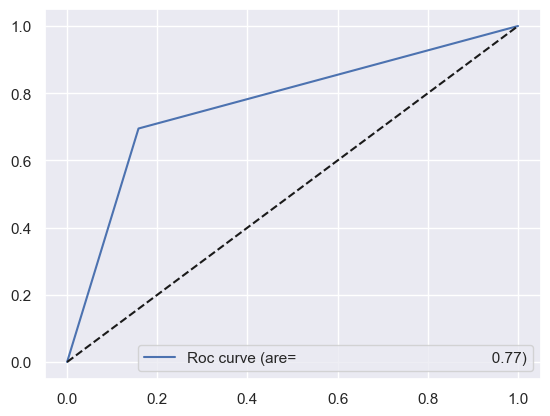

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_pred)
roc_auc = metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr, tpr, label="Roc curve (are=%50.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="lower right")

In [32]:
log_model_prediction = logmodel.predict(X_test)

## LDA

Best test size found for LDA:  0.26


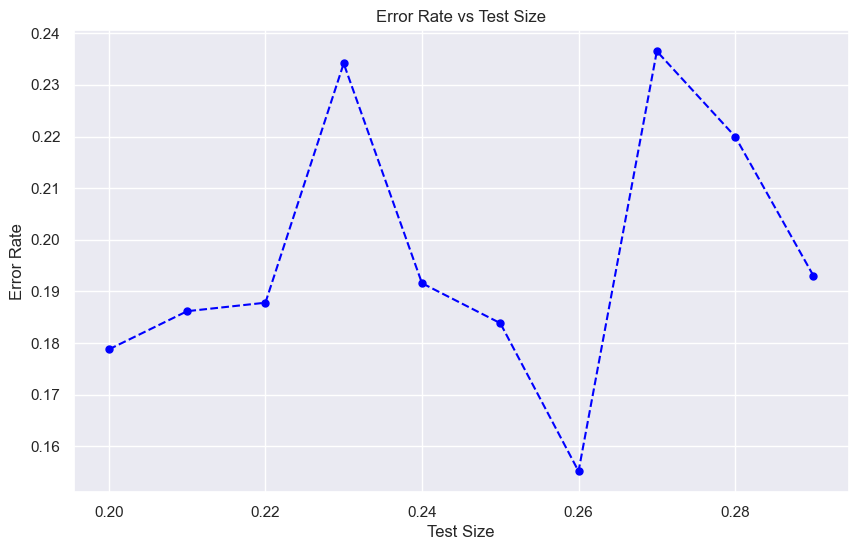

In [33]:
# finding optimal test size
errors = []
accuracy_logmodel = []
precision_logmodel = []
recall_logmodel = []
f1_logmodel = []
test_size = np.arange(.2,.3,.01)
for k in test_size:
    X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=k)
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_eval)
    errors.append(np.mean(y_pred != y_eval))
    accuracy_logmodel.append(accuracy_score(y_eval, y_pred))
    precision_logmodel.append(metrics.precision_score(y_eval, y_pred))
    recall_logmodel.append(metrics.recall_score(y_eval, y_pred))
    f1_logmodel.append(metrics.f1_score(y_eval, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(test_size,errors ,color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=5)
plt.title('Error Rate vs Test Size')
plt.xlabel('Test Size')
plt.ylabel('Error Rate')

lda_test_size = test_size[errors.index(min(errors))]
print('Best test size found for LDA: ',round(lda_test_size,2))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       137
           1       0.71      0.71      0.71        95

    accuracy                           0.76       232
   macro avg       0.75      0.75      0.75       232
weighted avg       0.76      0.76      0.76       232



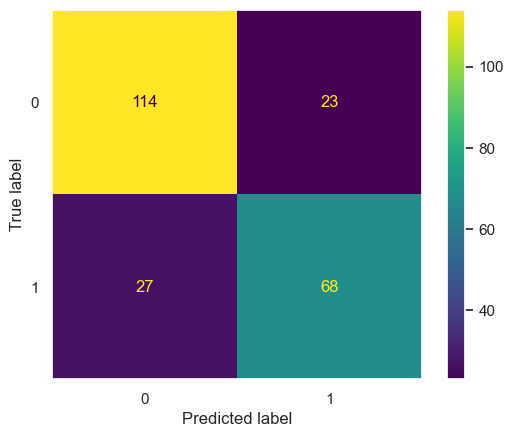

In [34]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=lda_test_size)
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_eval)
print(classification_report(y_eval,y_pred))
confusion_matrix(y_eval, y_pred)

acc_lda = round(clf.score(X_train, y_train) * 100, 2)

accuracy_lda = accuracy_score(y_eval, y_pred)
precision_lda = metrics.precision_score(y_eval, y_pred)
recall_lda = metrics.recall_score(y_eval, y_pred)
f1_lda = metrics.f1_score(y_eval, y_pred)

plot_confusion_matrix(logmodel, X_eval, y_eval)  
plt.grid(False)

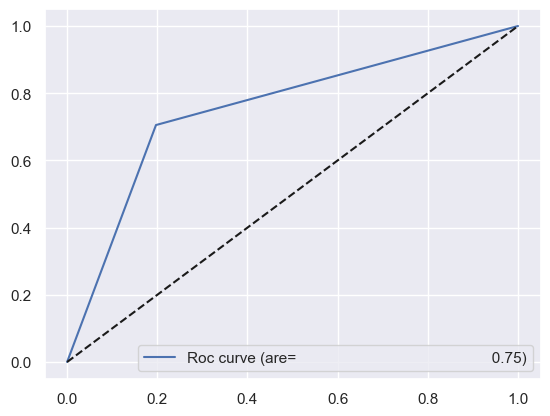

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_pred)
roc_auc = metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr, tpr, label="Roc curve (are=%50.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="lower right")

In [36]:
lda_prediction = clf.predict(X_test)

## Model comparison

In [37]:
#results = pd.DataFrame({
#    'Model': ['KNN', 'Logistic Regression', 'Discriminant Analysis'],
#    'Score': [ acc_knn, acc_log, acc_lda]})
#result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Score')
#result_df.head()

#sns.barplot(data=result_df, x='Model',y=result_df.index).set(title="Results")

[Text(0.5, 1.0, 'Results')]

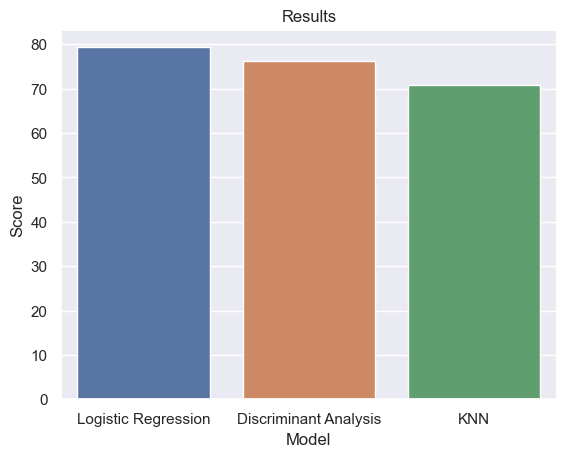

In [38]:
# Accuracy: how good we were in recognizing positive and negative
# Precision: how correct the classifier is
# Recall: how correct the classifier is
# F-Score: combination of presition and recall
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Discriminant Analysis'],
    'Score': [ accuracy_knn*100, accuracy_lm*100, accuracy_lda*100]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

sns.barplot(data=result_df, x='Model',y=result_df.index).set(title="Results")

LR: 0.798015 (0.026743)
LDA: 0.801361 (0.034739)
KNN: 0.699276 (0.031783)


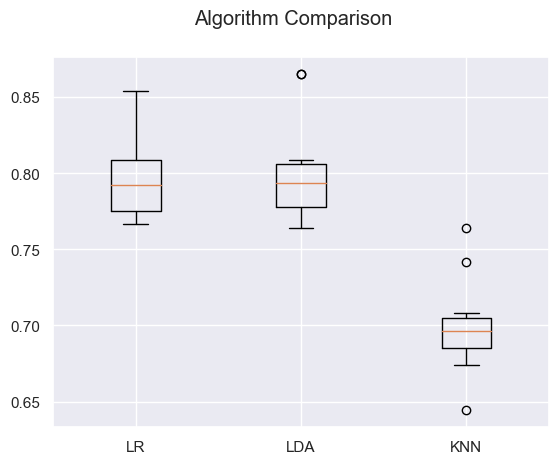

In [39]:
from sklearn import model_selection
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(k_value_opt)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

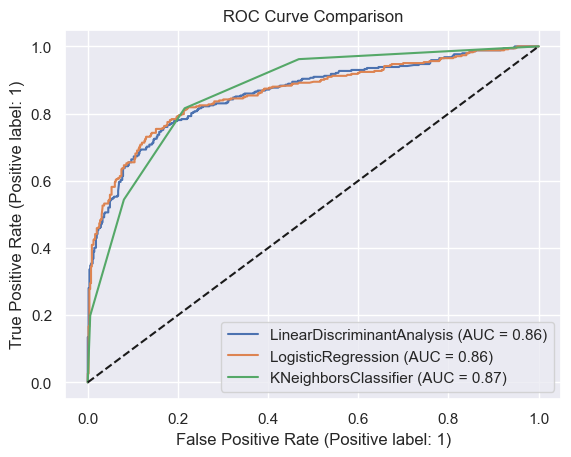

In [40]:
roc_lda = plot_roc_curve(estimator=clf, X=X, y=y)
roc_log_reg = plot_roc_curve(estimator=logmodel, X=X, y=y, ax=roc_lda.ax_)
roc_knn = plot_roc_curve(estimator=knn, X=X, y=y, ax=roc_lda.ax_)
plt.title("ROC Curve Comparison")
plt.plot([0,1],[0,1],'k--')
plt.show()

## Change variables - Pending

[Text(0.5, 1.0, 'Results without Fare')]

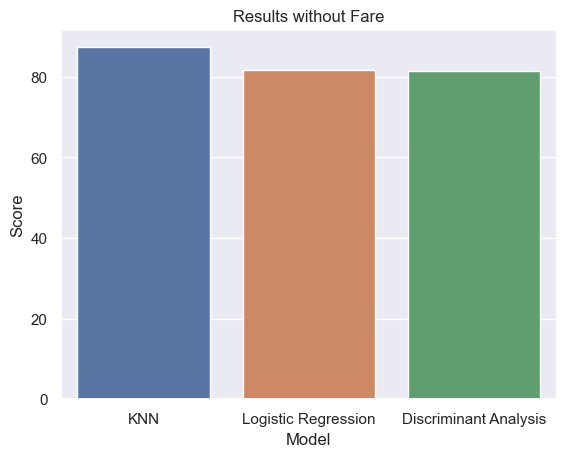

In [41]:
# converting categorical variables into numerical while saving in a new d
X_train2  = pd.get_dummies(titanic_data[[ 'Pclass', 'Sex',\
                             'Age', 'Family', 'Cabin', 'Embarked']])
Y_train2 = titanic_data['Survived']
X_test2 = pd.get_dummies(titanic_test[[ 'Pclass', 'Sex',\
                             'Age', 'Family', 'Cabin', 'Embarked']])

#KNN
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train2, Y_train2)  
Y_pred = knn.predict(X_test2)  
acc_knn = round(knn.score(X_train2, Y_train2) * 100, 2)

#Log Regr
logreg = LogisticRegression()
logreg.fit(X_train2, Y_train2)

Y_pred = logreg.predict(X_test2)

acc_log = round(logreg.score(X_train2, Y_train2) * 100, 2)

#LDA
clf = LinearDiscriminantAnalysis()
clf.fit(X_train2, Y_train2)
clf.predict(X_test2)
acc_lda = round(clf.score(X_train2, Y_train2) * 100, 2)

# Results
results2 = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Discriminant Analysis'],
    'Score': [ acc_knn, acc_log, acc_lda]})
result_df2 = results2.sort_values(by='Score', ascending=False)
result_df2 = result_df2.set_index('Score')
result_df2.head()

sns.barplot(data=result_df2, x='Model',y=result_df2.index).set(title="Results without Fare")

In [42]:
### IN CASE WE HAVE TIME


# finding optimal test size 
errors = []
accuracy_knn = []
precision_knn = []
recall_knn = []
f1_knn = []
for k in range(1,10):
    for z in np.arange(.2,.3,.01):
        X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=z, random_state = 0)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_eval)
        errors.append((k,np.mean(y_pred != y_eval)))
        accuracy_knn.append((k,accuracy_score(y_eval, y_pred)))
        precision_knn.append((k,metrics.precision_score(y_eval, y_pred)))
        recall_knn.append((k,metrics.recall_score(y_eval, y_pred)))
        f1_knn.append((k,metrics.f1_score(y_eval, y_pred)))
        


### Feature Selection

In [44]:
from sklearn.feature_selection import SelectKBest,f_classif
from numpy import set_printoptions

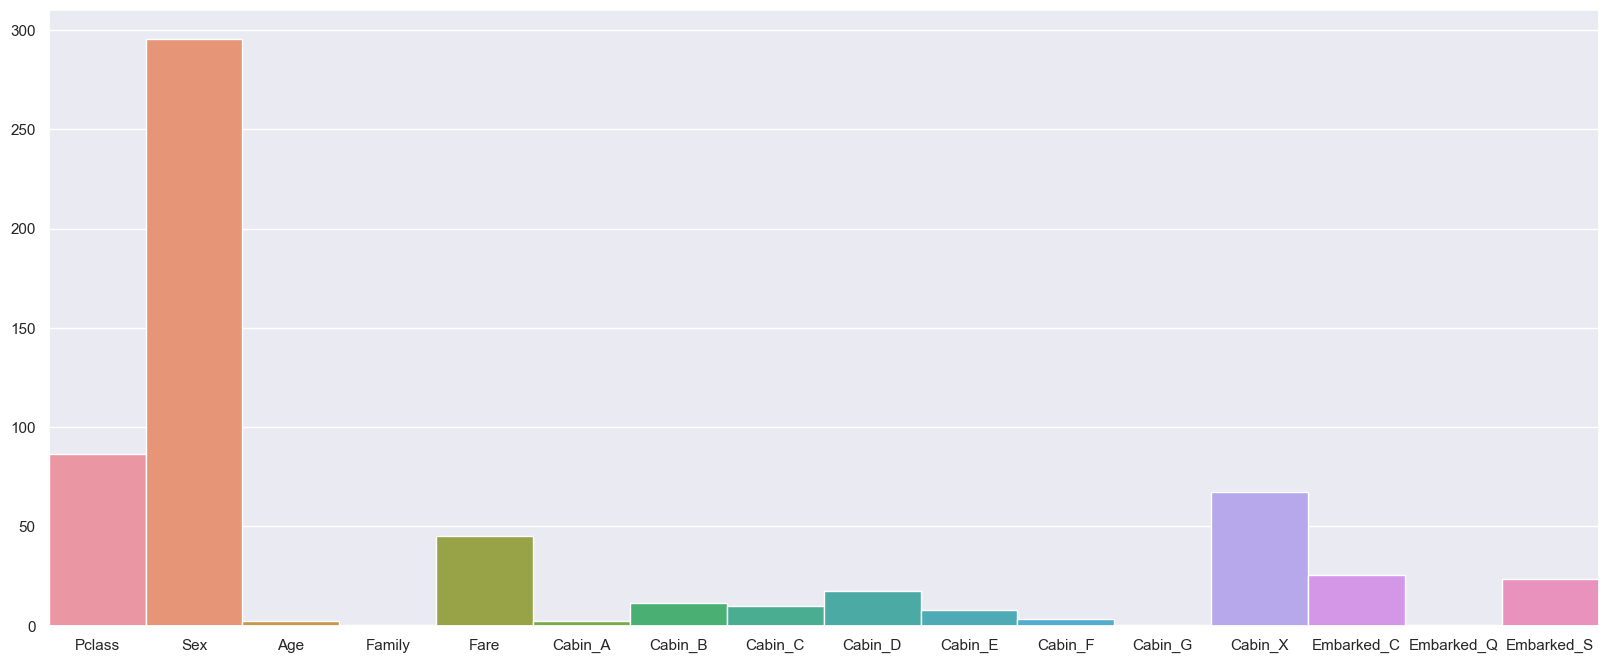

In [121]:
# feature extraction
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=0.29)
test = SelectKBest(score_func=f_classif, k=3)
fit = test.fit(X_train, y_train)
# summarize scores
set_printoptions(precision=4)
plt.figure(figsize=(20,8))
sns.barplot(x=X_train.columns, y=fit.scores_, width=1)
features = fit.transform(X_eval)
# summarize selected features

In [122]:
from numpy import array


filter = test.get_support()
features = array(X_train.columns)
 
print("All features:")
print(features)
 
print("Selected best 4:")
print(features[filter])

All features:
['Pclass' 'Sex' 'Age' 'Family' 'Fare' 'Cabin_A' 'Cabin_B' 'Cabin_C'
 'Cabin_D' 'Cabin_E' 'Cabin_F' 'Cabin_G' 'Cabin_X' 'Embarked_C'
 'Embarked_Q' 'Embarked_S']
Selected best 4:
['Pclass' 'Sex' 'Cabin_X']


In [112]:
features[test.get_support()]

array(['Pclass', 'Sex', 'Fare', 'Cabin_X'], dtype=object)

In [88]:
def lowestErrorKNN(X,y):
    errors = []
    accuracy_knn = []
    precision_knn = []
    recall_knn = []
    f1_knn = []
    test_size = np.arange(.2,.4,.01)
    for k in test_size:
        X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=k)
        knn = KNeighborsClassifier(n_neighbors = k_value_opt)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_eval)
        errors.append(np.mean(y_pred != y_eval))
        accuracy_knn.append(accuracy_score(y_eval, y_pred))
        precision_knn.append(metrics.precision_score(y_eval, y_pred))
        recall_knn.append(metrics.recall_score(y_eval, y_pred))
        f1_knn.append(metrics.f1_score(y_eval, y_pred))

    knn_test_size = test_size[errors.index(min(errors))]
    return round(knn_test_size,2)

In [145]:
def knn_on_features(x, y, k):
    k_range = np.arange(1,k,1)
    knn_errors = []
    featureArray = []
    for i in k_range:
        test = SelectKBest(score_func=f_classif, k=i)
        fit = test.fit(x, y)
        features = fit.transform(x)
        filter = test.get_support()
        features_columns = array(x.columns)
        featureArray.append(features_columns[filter])
        knn_errors.append(lowestErrorKNN(features,y))

    return k_range, knn_errors, featureArray
    

    

<AxesSubplot: >

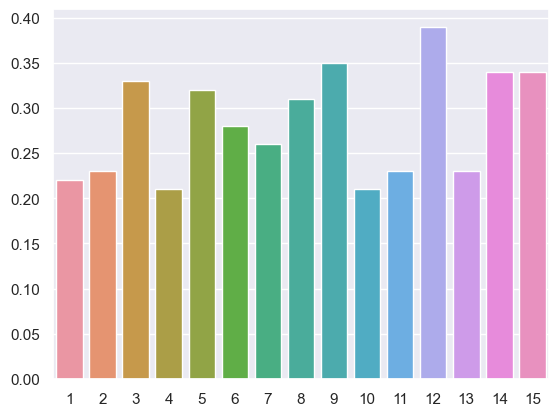

In [173]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=0.3)
features_selected, knn_errors, featureArray = knn_on_features(X_train, y_train, 16)
sns.barplot(x=features_selected, y=knn_errors)


In [164]:
featureArray

[array(['Sex'], dtype=object),
 array(['Pclass', 'Sex'], dtype=object),
 array(['Pclass', 'Sex', 'Cabin_X'], dtype=object),
 array(['Pclass', 'Sex', 'Cabin_B', 'Cabin_X'], dtype=object),
 array(['Pclass', 'Sex', 'Cabin_B', 'Cabin_X', 'Embarked_C'], dtype=object),
 array(['Pclass', 'Sex', 'Cabin_B', 'Cabin_D', 'Cabin_X', 'Embarked_C'],
       dtype=object),
 array(['Pclass', 'Sex', 'Cabin_B', 'Cabin_D', 'Cabin_X', 'Embarked_C',
        'Embarked_S'], dtype=object),
 array(['Pclass', 'Sex', 'Cabin_B', 'Cabin_D', 'Cabin_E', 'Cabin_X',
        'Embarked_C', 'Embarked_S'], dtype=object),
 array(['Pclass', 'Sex', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
        'Cabin_X', 'Embarked_C', 'Embarked_S'], dtype=object),
 array(['Pclass', 'Sex', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
        'Cabin_F', 'Cabin_X', 'Embarked_C', 'Embarked_S'], dtype=object),
 array(['Pclass', 'Sex', 'Age', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
        'Cabin_F', 'Cabin_X', 'Embarked_C', 'Embarked_S'], 

In [191]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model,n_features_to_select= 4)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Feature Ranking: [ 2  1 10  9 13  8 12  6  3  4  1  1  1  5  7 11]


In [192]:
filter = fit.get_support()
features_columns = array(X_train.columns)
features_columns[filter]

array(['Sex', 'Cabin_F', 'Cabin_G', 'Cabin_X'], dtype=object)

<AxesSubplot: >

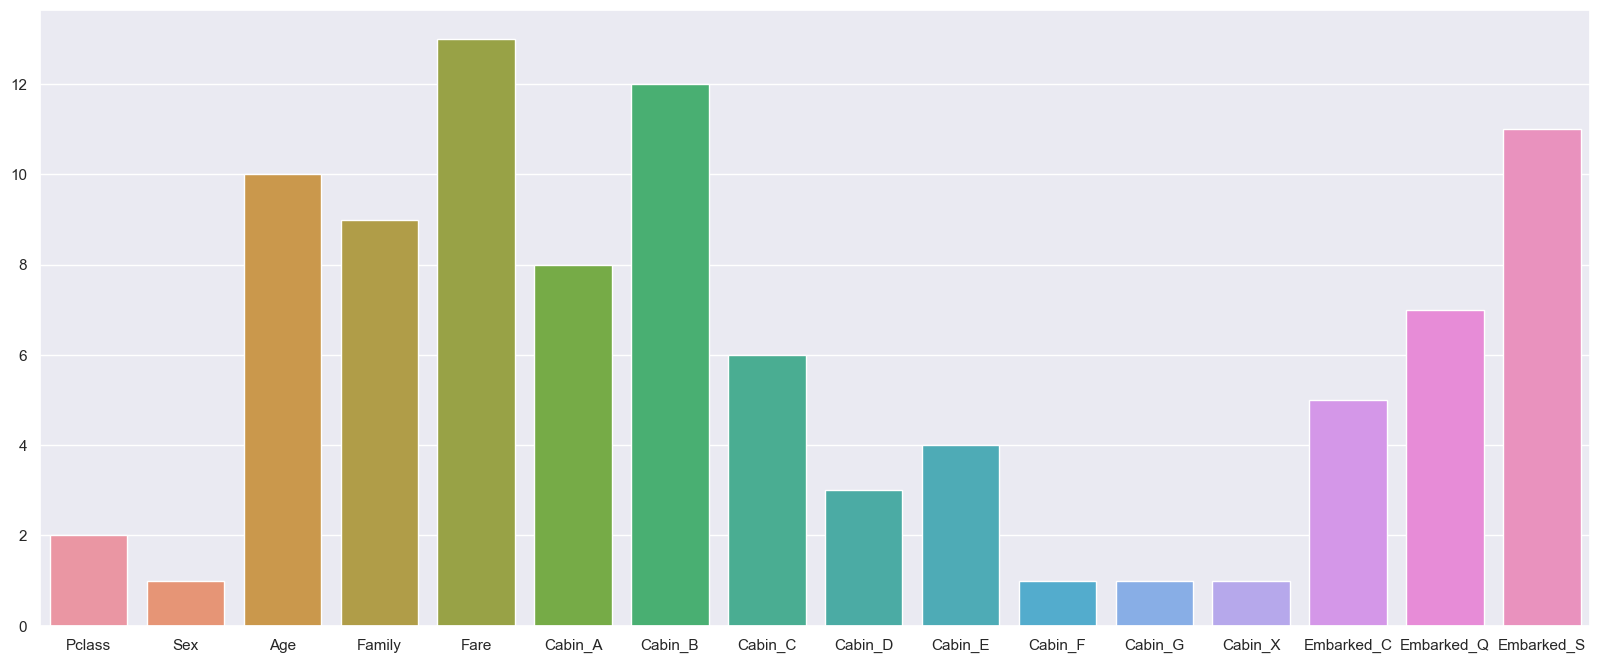

In [193]:
plt.figure(figsize=(20,8))
sns.barplot(x=X_train.columns, y=fit.ranking_)